<a href="https://colab.research.google.com/github/rafaelnduarte/Analysis_of_Violence_in_Rio_de_Janeiro/blob/master/Analysis_of_violence_in_Rio_De_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of violence in Rio De Janeiro

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

Rio de Janeiro, also known as *the marvelous city*, is the most visited city in Brazil, and the second most visited in South America, according to [travelaway.me](https://travelaway.me/best-cities-brazil/).

Rio is known for its **natural settings**, **Carnaval**, **samba**, bossa nova, and Balneario beaches such as **Barra da Tijuca, Copacabana, Ipanema, and Leblon**. In addition to the beaches, it's home to some of the most famous landmarks such as **Christ the Redeemer** atop **Corcovado** mountain, named one of the **New Seven Wonders of the World**; **Sugarloaf Mountain** with its cable car; **the Sambódromo (Sambadrome)**, a permanent grandstand-lined parade avenue which is used during **Carnaval**; and **Maracanã Stadium**, one of the world's largest soccer stadiums.


<center><img alt="Rio de Janeiro" width="40%" src="https://image.freepik.com/free-vector/brazilian-pattern-colorful-style_1015-216.jpg"></center>


It all sounds amazing, and the city is nothing short of **breathtakingly beautiful**, but its inhabitants suffer from the violence that takes place in this beautiful city. Militias, gangs, druglords, and regular old thieves teorrorize the city.

Right next to its most famous and luxurious neighborhoods, there are ***favelas*** **(slums)**, where people live in **poverty**, and, among many other factors, the lack of **opportunity** and **education** lead young children to crime. This is a serious problem that goes beyond any analysis. However, there's plenty of data to be analyzed on the topic.


### The objective of this notebook is to provide a comprehensive understanding of the current scenario in Rio de Janeiro when it comes to violence.


## Obtaining the data

The data we are going to analyze here is made available by the **Police of Rio de Janeiro** (*Polícia Militar do Estado do Rio de Janeiro*) on their [website](http://www.ispdados.rj.gov.br/estatistica.html).

If you want to learn more, make sure to check their website, and this [interactive dashboard](http://www.ispvisualizacao.rj.gov.br/index.html) of the same dataset.

In [0]:
# importing the necessary packages for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# installing package for waffle charts
!pip install pywaffle -q
# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline
sns.set_style()

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv', sep=',')

## Analyzing the data



### Q1. How many variables and entries are there in the dataset?

In [0]:
# checking variables and entries
print("Variables:\t{}\nEntries:\t{}".format(df.shape[1], df.shape[0]))

# identifying the types of the variables
display(df.dtypes)

Variables:	56
Entries:	344


vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

#### Data Dictionary

Here we'll analyze all of the variables and what they mean.
It's important to note that the legal system in Brazil is different, and the description and understanding of crimes in Brazil may differ from foreign law.

* vano = year of the occurrency
* mes = month of the occurrency
* hom_doloso = Intended murder
* lesao_corp_morte = assault resulting in death
* latrocinio = theft resulting in death
* hom_por_interv_policial = death as a result of police intervetion
* tentat_hom = attempted murder
* lesao_corp_dolosa = "intended" assault
* estupro = rape
* hom_culposo = Unintended murder
* lesao_corp_culposa = "unintended" assault
* roubo_comercio = burglary in stores
* roubo_residencia = burglary in residencies
* roubo_veiculo = car robbery
* roubo_carga = cargo robbery
* roubo_transeunte = street robbery
* roubo_em_coletivo = robbery in public transportation
* roubo_banco = bank robbery
* roubo_cx_eletronico = atm robbery
* roubo_celular = cellphone robbery
* roubo_conducao_saque = robbery taking the victim to make withdrawals
* roubo_apos_saque = robbert after a withdrawal
* roubo_bicicleta = bike robbery
* outros_roubos = other kinds of robbery
* total_roubos = total  of robberies
* furto_veiculos = car theft
* furto_transeunte = pedestrian theft
* furto_coletivo = theft in public transportation
* furto_celular = cellphone theft
* furto_bicicleta = bike theft
* outros_furtos = other kinds of theft
* total_furtos = total thefts
* sequestro = kidnapping
* extorsao = extorsion
* sequestro_relampago = "express kidnapping"
* estelionato = larceny
* apreensao_drogas = drug aprehension
* posse_drogas = drug possesion
* trafico_drogas = drug traffiking
* apreensao_drogas_sem_autor = drug aprehension with no responsible
* recuperacao_veiculos = stolen vehicle recovery
* apf	= flagrant arrest
* aaapai = arrest of juvenile criminals
* cmp = execution of arrest warrant
* cmba = execution of search warrant
* ameaca = threatening
* pessoas_desaparecidas = missing people
* encontro_cadaver = finding of a corpse
* encontro_ossada = finding of bones
* pol_militares_mortos_serv = military policemen deaths in service
* pol_civis_mortos_serv = civilian policemen deaths in service
* indicador_letalidade = case fatality rate
* indicador_roubo_rua = street robbery rate
* indicador_roubo_veic = vehicle robbery rate
* registro_ocorrencias = police report registration
* fase = phase of investigation

In [0]:
# checking the "face" of the dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


**The first 5 entries of the dataset show us that there are plenty of missing values already. In this dataset, some of the variables started to be recorded only after some time, so the first entries have no values for these variables.**

To confirm this statement, let's see the "tail" of the dataset, where more recent data is shown.

In [0]:
# checking the most recent entries of the dataset 
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


**As seen above, the most recent data have no missing values for any of the variables, confirming our theory.**

### Q2. What's the percentage of missing values?

We've already seen that there is some missing data due to the time when certain variables started to be taken into account.

In this dataset, the missing data is actually blank spaces, which can't be accounted for using pandas.

To get the actual count, we need to transform blank to NaN, and then, strings to numerical.

Let's check all of the variables to look for more missing values.

In [0]:
# replacing blanks with NaN
df.replace(r'\s+', np.nan, regex=True)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


In [0]:
# columns to be converted: 'lesao_corp_morte', 'hom_por_interv_policial', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas', 'encontro_ossada', 'pol_militares_mortos_serv', 'pol_civis_mortos_serv', 'registro_ocorrencias'
# converting strings to numeric

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [0]:
# sort variables by missing values
(df.isnull().sum()).sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

In [0]:
# checking the percentage of missing values
(df.isnull().sum()/ df.shape[0] * 100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


### **Q3. What is the statistical distribution of the data?** 

To help us understand the distribution of the data, let's plot histograms:

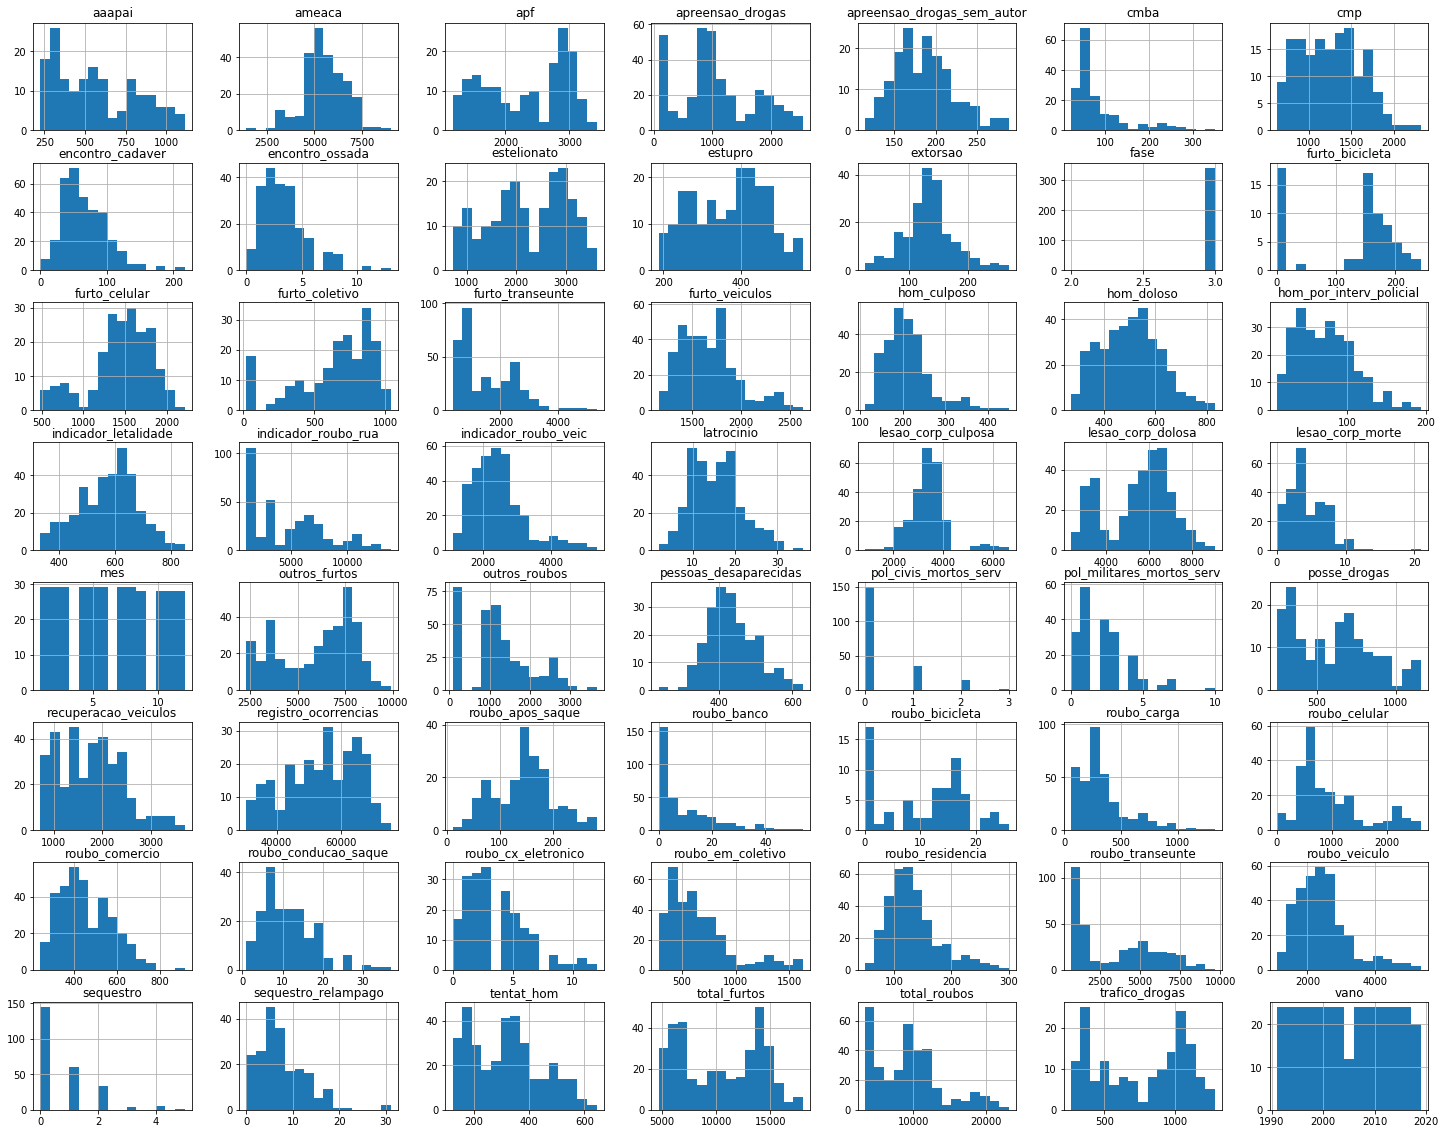

In [0]:
df.hist(bins=15, figsize=(25,20));



### Q4. Statistical information on the violence in Rio

As stated before, despite being one of the most beautiful cities in the world, Rio suffers from the violence that takes place in the city.

To better understand what happens there, let's take a better look at the statistical distribution of the data.

In [0]:
## statistical distribution of the data
df.describe()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [0]:
# finding the average of vehicle robbery, theft and recovery
print('Average for Vehicle Robbery: \t',df.roubo_veiculo.mean())
print('Average for Vehicle Theft: \t',df.furto_veiculos.mean())
print('Average for Stolen Vehicle Recovery: \t', df.recuperacao_veiculos.mean())

Average for Vehicle Robbery: 	 2448.6976744186045
Average for Vehicle Theft: 	 1674.671511627907
Average for Stolen Vehicle Recovery: 	 1772.2383720930231


Percentage of recovered vehicles:	 42.980346705075085


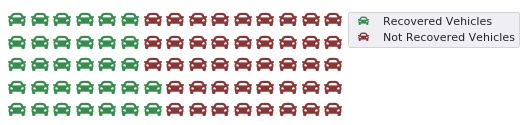

In [0]:
#@title Percentage of Recovered Vehicles
# waffle chart and percentage of Recovered Vehicles
from pywaffle import Waffle
data = df.recuperacao_veiculos.mean() / (df.roubo_veiculo.mean() + df.furto_veiculos.mean()) * 100
print('Percentage of recovered vehicles:\t',data)
# plotting waffle chart
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#348F4D", "#8F3434"),
                values={'Recovered Vehicles': 43,
                        'Not Recovered Vehicles': 57,
                        }, icons='car', icon_size=18,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )
fig.set_tight_layout(False)
plt.show();

In [0]:
# finding max and minimum values for "intentional murder"
print('Max for "Intentional Murder: \t',df.hom_doloso.max())
print('Min for "Intentional Murder: \t',df.hom_doloso.min())

Max for "Intentional Murder: 	 831
Min for "Intentional Murder: 	 272


## Visualizing the data

Now that we have a better understanding of the dataset, it's time to make our insights more visual, and come to some conclusions on the information we gathered.

Following, we'll analyze three categories of crimes:
* Violent Crimes
* Property Related Crimes
* Drugs and War on Drugs

### Violent Crimes

In this regard, we analyzed the variables for **"Intentional murder", rape, kidnapping, and robbery with death as a result.**

Keep in mind that the descriptions of this crimes are specific to the Brazilian Law System, and may differ in type and name to those found in other countries.

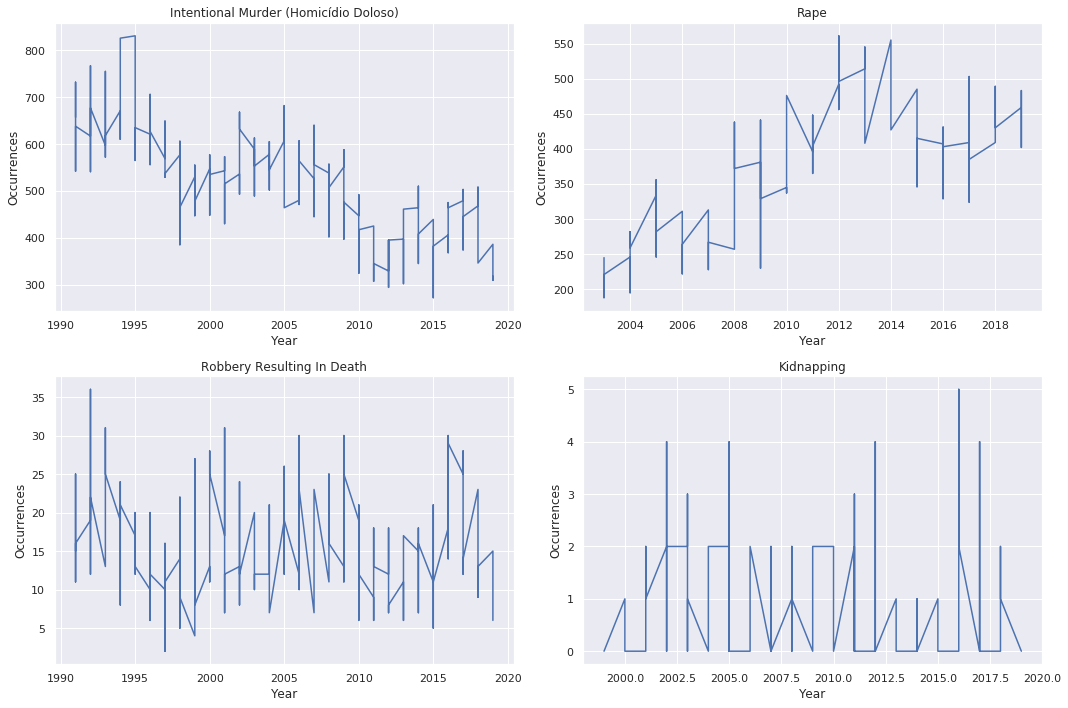

In [0]:
#@title Visualization
# plotting the graphs
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.set()
# graph 1
ax[0,0].plot(df.vano, df.hom_doloso)
ax[0,0].set_title("Intentional Murder (Homicídio Doloso)")
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Occurrences")

# graph 2
ax[0,1].plot(df.vano, df.estupro)
ax[0,1].set_title("Rape")
ax[0,1].set_xlabel("Year")
ax[0,1].set_ylabel("Occurrences")

# graph 3
ax[1,0].plot(df.vano, df.latrocinio)
ax[1,0].set_title("Robbery Resulting In Death")
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Occurrences")

# graph 4
ax[1,1].plot(df.vano, df.sequestro)
ax[1,1].set_title("Kidnapping")
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Occurrences")

fig.tight_layout();

### Property Related Crimes

In this section, we analyze property related crimes, such as **cellphone robbery, robbery inside public transportation, pedestrian robbery, house burglary, business robbery, and car robbery.**

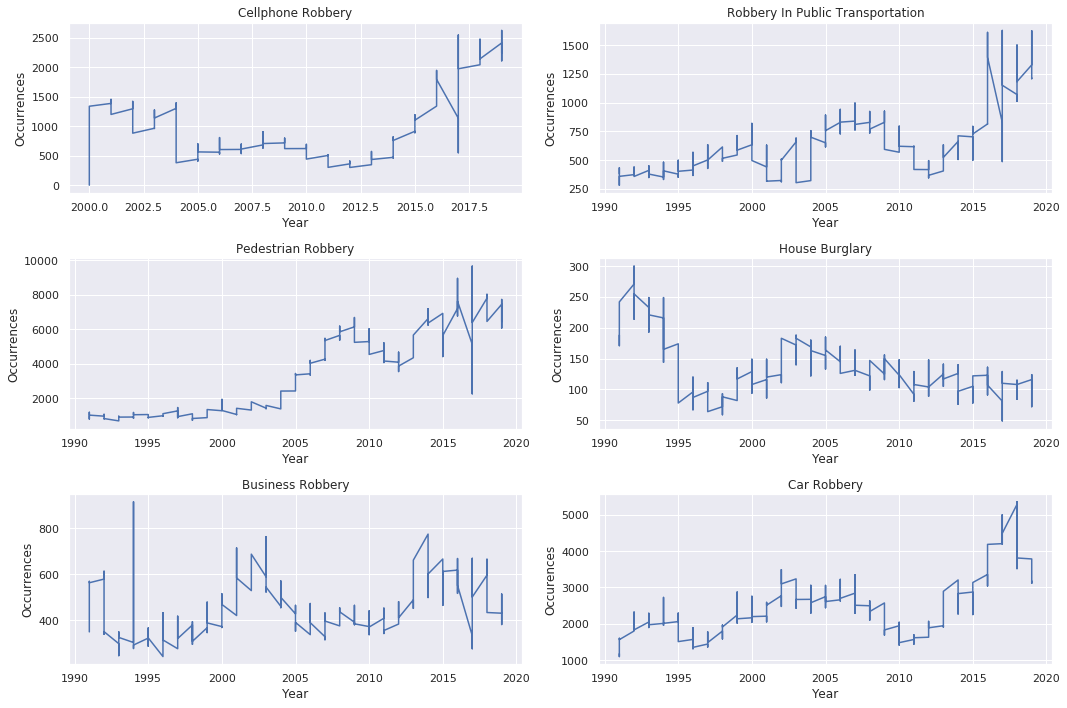

In [0]:
#@title Visualization
# plotting the graphs
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.set()
# graph 1
ax[0,0].plot(df.vano, df.roubo_celular)
ax[0,0].set_title("Cellphone Robbery")
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Occurrences")

# graph 2
ax[0,1].plot(df.vano, df.roubo_em_coletivo)
ax[0,1].set_title("Robbery In Public Transportation")
ax[0,1].set_xlabel("Year")
ax[0,1].set_ylabel("Occurrences")

# graph 3
ax[1,0].plot(df.vano, df.roubo_transeunte)
ax[1,0].set_title("Pedestrian Robbery")
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Occurrences")

# graph 4
ax[1,1].plot(df.vano, df.roubo_residencia)
ax[1,1].set_title("House Burglary")
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Occurrences")

# graph 5
ax[2,0].plot(df.vano, df.roubo_comercio)
ax[2,0].set_title("Business Robbery")
ax[2,0].set_xlabel("Year")
ax[2,0].set_ylabel("Occurrences")

# graph 6
ax[2,1].plot(df.vano, df.roubo_veiculo)
ax[2,1].set_title("Car Robbery")
ax[2,1].set_xlabel("Year")
ax[2,1].set_ylabel("Occurences")


fig.tight_layout();

### Drugs and the War on Drugs

In this section, we analyze drug-related data, such as **drug trafficking and drug apprehension**.

We also analyze the variables that are related to the war on drugs that is fought in the streets of Rio, causing the death of policemen, criminals, and innocent people.

To better understand this context, we analyze both **military and civilian policemen deaths**, as well as **deaths caused by police intervention**.

Mind that in Brazil, there are two kinds of Police Forces: **Military and Civilian.**

In short, the *Military* policemen are responsible for guarding the streets, having a more "hands-on" approach when compared to *Civilian* forces, that have duties that are more related to intelligence, investigation, etc. 

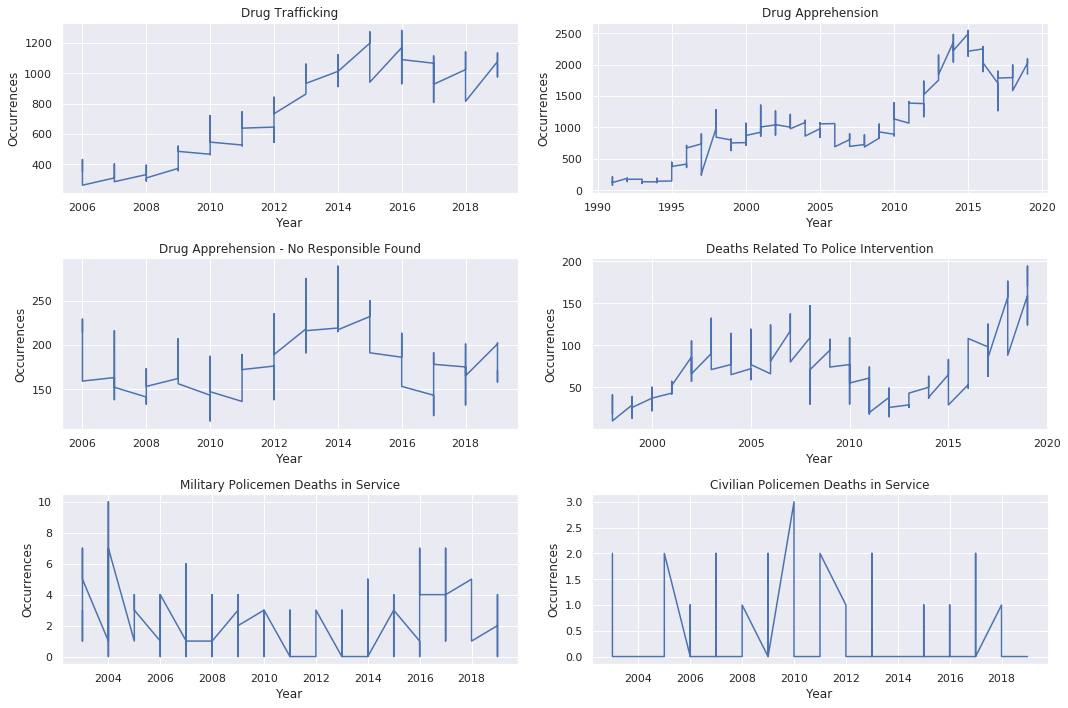

In [0]:
#@title Visualization
# plotting the graphs
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.set()
# graph 1
ax[0,0].plot(df.vano, df.trafico_drogas)
ax[0,0].set_title("Drug Trafficking")
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Occurrences")

# graph 2
ax[0,1].plot(df.vano, df.apreensao_drogas)
ax[0,1].set_title("Drug Apprehension")
ax[0,1].set_xlabel("Year")
ax[0,1].set_ylabel("Occurrences")

# graph 3
ax[1,0].plot(df.vano, df.apreensao_drogas_sem_autor)
ax[1,0].set_title("Drug Apprehension - No Responsible Found")
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Occurrences")

# graph 4
ax[1,1].plot(df.vano, df.hom_por_interv_policial)
ax[1,1].set_title("Deaths Related To Police Intervention")
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Occurrences")

# graph 5
ax[2,0].plot(df.vano, df.pol_militares_mortos_serv)
ax[2,0].set_title("Military Policemen Deaths in Service")
ax[2,0].set_xlabel("Year")
ax[2,0].set_ylabel("Occurrences")

# graph 6
ax[2,1].plot(df.vano, df.pol_civis_mortos_serv)
ax[2,1].set_title("Civilian Policemen Deaths in Service")
ax[2,1].set_xlabel("Year")
ax[2,1].set_ylabel("Occurrences")


fig.tight_layout();

## Conclusions


With all of the data analyzed in this notebook, we can get to some conclusions. To better understand them, let's look at them keeping the categories previously established.


**Violent Crimes**
* We can see that the rates for this kind of crime are far from the highest ever.
* Even though it's still high, the number of rapes have been decreasing after its peak in 2012.
* "Intentional murder" rates have also been decreasing, which represents an improvement.
* Robbery resulting in death is also decreasing, showing currents result that is close to its all-time lowest.
* Kidnapping rates are low.


Overall, these are good results, which shows that the efforts to fight crime in the city have been paying off. The numbers are far from ideal, but Rio seems to be on the right track.

* **

**Property Related Crimes**
* We can find a relation between cellphone and pedestrian robbery, as well as robbery inside of public transportation. It's possible to identify a sudden rise in the rates of these crimes in 2015. In 2015, great changes were made to smartphones, making them more similar to what we have now than what we used to have. iPhone 6S, Samsung Galaxy S6 Edge+, among others, were launched this year. More interesting cellphones out there, with even more people carrying them around, presented thieves with an opportunity, which explains the rise.
* It is worrying that the rates for cellphone robbery and robbery inside of public transportation are increasing, which represents the intense interest criminals have in cellphones. They're easy to acquire and sell, and also have relevant economical value, making them one of the most common objects of interest for criminals.
* When it comes to pedestrian robberies, the rates are decreasing after 2016/2017, with safer and more reliable means of transportation becoming more popular, such as Uber, Cabify, 99pop, etc.
* Both house burglary and business robbery have shown decreasing rates. With more advanced surveillance technology making it more difficult for criminals to be successful in committing these crimes, it makes sense that these rates would decrease.

* **

**Drugs and the War on Drugs**

* When it comes to drug trafficking, we can observe very high rates. They have been higher, but haven't exactly been decreasing. There's still a lot of work to be done.
* Drug Apprehension rates are still high too. Since drug trafficking rates are high, it makes sense that drug apprehension rates are high too.
* Deaths related to police intervention have been increasing. This is extremely disturbing and makes us see the effects of the war on drugs. 
* Military Policemen deaths are lower than they used to be, showing improvements. This can be a result of more intelligent work and overall better preparation by the police. It makes sense that more military officers die when compared to civilian ones since the first is the force patrolling the streets and confronting criminals.

**Overall, we can see improvements in most areas. It's interesting to see how cellphones influence the scneario of robberies, and how much modern technologies might have influenced the lower rates of house burglary and business robbery.**

This was still a simple analysis, and much more can be extracted from this dataset.

Hope you enjoyed it, and feel free to give me any feedback you may have!

[<center><img alt="LinkedIn" width="20%" src="https://www.freepnglogos.com/uploads/linkedin-png-logo-23.png
"></center>](https://www.linkedin.com/in/rafael-n-duarte/) 
[<center><img alt="GitHub" width="20%" src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png
"></center>](https://github.com/rafaelnduarte)

<center><img width = '80%'src= "https://github.com/rafaelnduarte/Portfolio/blob/master/rafaelnd_banner.png?raw=true"></center>
